# CS 6220 - Data Mining Techniques

## <div style="text-align: center"> Medical Cost Prediction </div>


<div style="text-align: right"> <b> A Project by Team Sage </div>
<div style="text-align: right"> <b> <i>Madhura Prashant Vaidya, Rajkumar Baskar, Shreeyash Amit Yende </div>


The main objective of this project is to predict the premium for an individual based on readily available information that could be utilized to find a pattern from the previous years’ data. Here, we use the Kaggle dataset for insurance forecast, consisting of about 1338 records, each with seven features.

link to dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
## pip commands that might come handy for missing packages

## pip install 

In [2]:
# import required modules

import requests
from io import StringIO
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# display the dataframe as an HTML object
def disp_df(df):
    display(HTML(df.to_html(index=False)))

In [3]:
# download and read all zipped input data (downloaded from kaggle and uploaded to personl google drive location)

download_url = "https://drive.google.com/uc?id=1Q88ui4Qa8yrM-EoEdACCBtF0Tq3y1mVo&export=download"
inp_data = pd.read_csv(StringIO(''.join([line for line in requests.get(download_url).content.decode('ISO-8859-1') ])))

# display the first few records to get an insight on the structure of the data
disp_df(inp_data.head())

age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.92400
18,male,33.770,1,no,southeast,1725.55230
28,male,33.000,3,no,southeast,4449.46200
33,male,22.705,0,no,northwest,21984.47061
32,male,28.880,0,no,northwest,3866.85520


The seven features include – age, sex, BMI (body mass index), children count, smoking status, region, and premium/charges. The goal would be to accurately predict the charges for unseen data based on the given information.

### 1. Data Cleaning

In [4]:
# check data for missing values
print(inp_data.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


There seems to be no missing values. Now we check for duplicates and remove them.

In [5]:
# check for duplicates and print it
disp_df(inp_data[inp_data.duplicated()])

# remove the duplicate entries
inp_data.drop_duplicates(inplace=True)

age,sex,bmi,children,smoker,region,charges
19,male,30.59,0,no,northwest,1639.5631


### 2. Data Visualization and Statistics

Acquiring the statistics for the numerical features..

In [6]:
num_cols = inp_data.select_dtypes(include='number')
cat_cols = inp_data.select_dtypes(exclude='number')

In [7]:
inp_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


.. and the unique values of non-numeric features.

In [8]:
for col in cat_cols:
    print(f"Feature: {col.ljust(10)}  -  Unique Values: {inp_data[col].unique()}")

Feature: sex         -  Unique Values: ['female' 'male']
Feature: smoker      -  Unique Values: ['yes' 'no']
Feature: region      -  Unique Values: ['southwest' 'southeast' 'northwest' 'northeast']


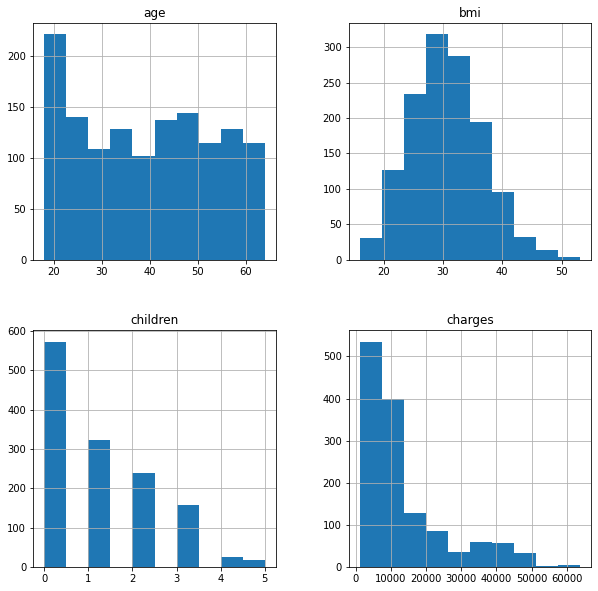

In [9]:
# plot the distribution of numeric features
inp_data.hist(figsize=(10, 10));

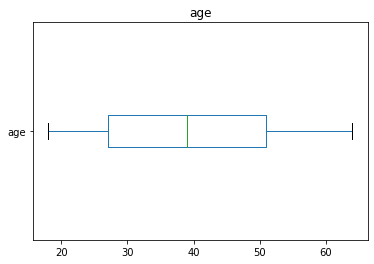

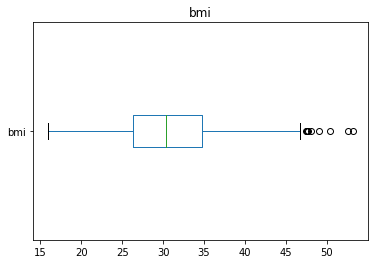

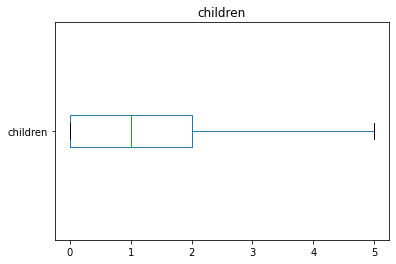

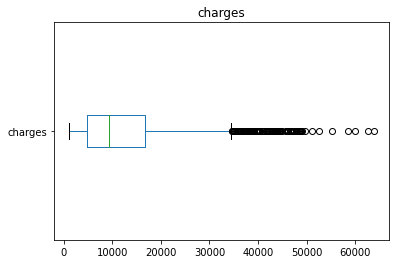

In [10]:
# plot the range of numeric features to understand the trend and outliers
for col in num_cols:
    inp_data.boxplot(column=col, grid=False, vert=False);
    plt.title(col)
    plt.show()

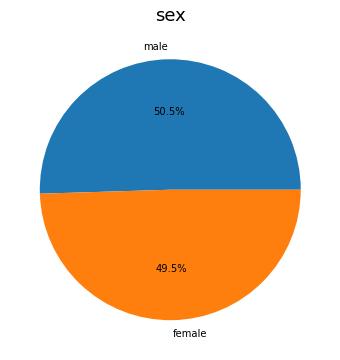

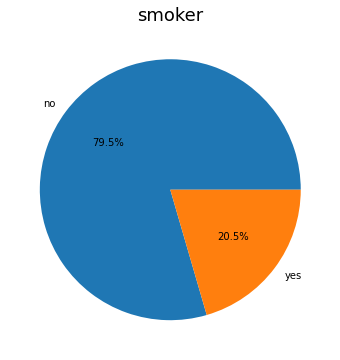

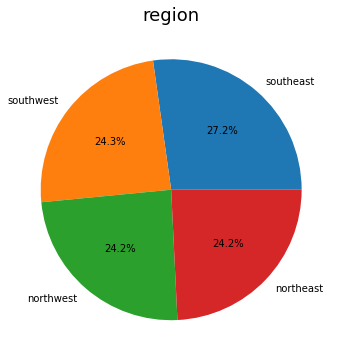

In [11]:
# plot the distribution of categorical features


for col in cat_cols:
    inp_data[col].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), legend=False);
    plt.title(col, fontdict={'fontsize':18})
    plt.ylabel('')
    plt.show()

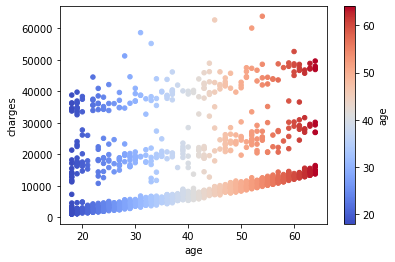

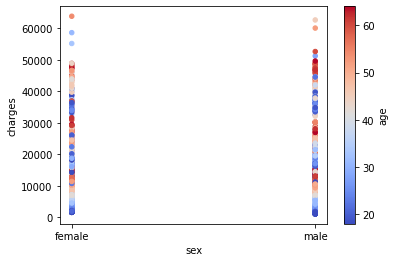

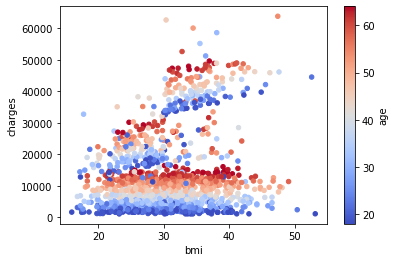

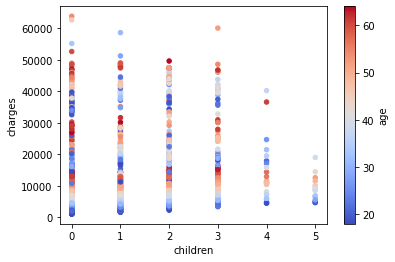

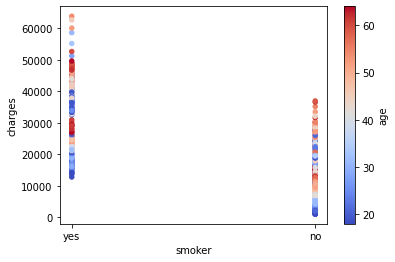

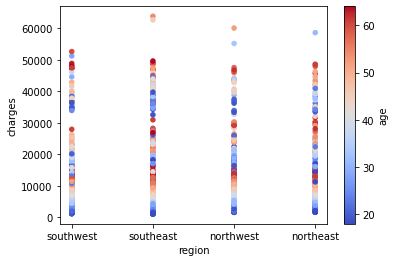

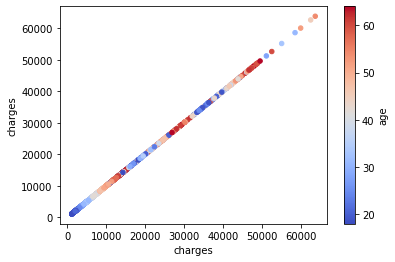

In [12]:
for col in inp_data.columns:
    inp_data.plot.scatter(x=col, y='charges', c='age', colormap='coolwarm', sharex=False);
    plt.show()